# **Day 2: Descriptive Analysis, Data Visualizations, and Evaluation**

Welcome to Day 2!

Today we’re stepping into the world of **Data Science** — and starting with the most important first step: **Descriptive Analysis**.

We’ll use a real student performance dataset to explore data, visualize patterns, and summarize what the data is telling us.



## What You'll Learn Today

- What is data science? (brief overview)
- What is descriptive analysis and why it matters
- Types of data (numerical vs. categorical)
- Summary statistics and visualizations



## What is Data Science?

Data science is the process of using tools and techniques to extract meaning from data.

It combines:
- **Math and statistics**
- **Computer programming**
- **Domain knowledge**

We use it to answer real-world questions, solve problems, and discover trends — from health and education to business and beyond.


## What is Descriptive Analysis?

Descriptive analysis is about **summarizing** data to understand what it looks like.

It helps answer questions like:
- What does the dataset look like?
- What are the most common values?
- Are there any patterns or outliers?

It **doesn't** make predictions — it’s about observing and describing.


---

## From Code to Data: What is a Variable in Data Science?

Yesterday, we learned that variables in Python are like **containers that store values** — like `student_name = "Alice"` or `score = 95`.

Today, we're looking at **data variables** — which are like **columns in a spreadsheet**, and each one holds a specific kind of information about every entry.

Think of a dataset about students:
- The `name` column is a **variable**.
- The `math_score` column is another **variable**.
- Even `passed_exam` (yes/no) is a variable.

Each row in the dataset is one student, and each column (variable) gives us one detail about them.

Now that we understand what a variable is in this context, let’s look at the **types** of variables we’ll encounter in datasets.

---

## Types of Data

Now that we understand what a variable is in a dataset (like a column in a spreadsheet), let’s explore the two main types of data you’ll see:

---

### Numerical Data (Also called Quantitative Data)

These are **numbers** you can measure or count. We can do math on them — like finding the average, minimum, or maximum.

There are two kinds:

- **Continuous**: These can be **any value** within a range, including decimals.  
  **Examples**:
  - A student’s height (e.g., 152.4 cm)
  - Final exam score (e.g., 87.5)
  - Time taken to complete homework (e.g., 45.2 minutes)

- **Discrete**: These are **whole numbers** — counts of things.  
  **Examples**:
  - Number of classes attended
  - Number of siblings
  - Number of late submissions

---

###  Categorical Data (Also called Qualitative Data)

These are **labels or categories**. They describe groups, not amounts. You usually can’t do math on these.

There are two kinds:

- **Nominal**: Categories with **no order** between them.  
  **Examples**:
  - School name (e.g., “GP”, “MS”)
  - Gender (e.g., Male, Female)
  - Favorite subject (e.g., Math, Science, English)

- **Ordinal**: Categories with a **meaningful order**, but no fixed difference between them.  
  **Examples**:
  - Satisfaction level (Low / Medium / High)
  - Grade (A / B / C)
  - Education level (High school / Bachelor's / Master's)

---

We’ll use both types today as we summarize and visualize our dataset!


## Tools We'll Use

We’ll use some powerful Python libraries to do our analysis:

- **Pandas**: For working with tables (rows and columns)
- **NumPy**: For basic math operations
- **Matplotlib**: For making charts and graphs
- **Seaborn**: A pretty version of Matplotlib that’s easier to use

Let’s import everything now so we’re ready to go.


This example imports four essential Python libraries commonly used for data analysis and visualization. pandas (imported as pd) is used for handling and analyzing structured data in the form of tables or DataFrames. numpy (as np) is a numerical library that provides fast and efficient operations on arrays and is often used behind the scenes by pandas. matplotlib.pyplot (as plt) is a basic plotting library that allows you to create visualizations like line plots, bar charts, and histograms. seaborn (as sns) is built on top of matplotlib and is used to create more attractive and informative statistical graphics. The line sns.set_style("whitegrid") sets a visual theme for Seaborn plots, making them cleaner and easier to read with a white background and grid lines. Together, these libraries form a powerful toolkit for exploring and presenting data.

In [1]:
# Let's import all the libraries we need for today's session.
# Everyone (you too!) should run this cell before continuing.

import pandas as pd
import numpy as np  # Often used implicitly by pandas, but good to import
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for seaborn plots for better aesthetics
sns.set_style("whitegrid")

print("Libraries imported successfully!")


Libraries imported successfully!


---

##  Quick Exercise: What Type of Data Is This?

Before we jump into a real dataset, let’s do a quick warm-up.

Look at the example below and decide whether each column is:

- **Numerical (Continuous or Discrete)**
- **Categorical (Nominal or Ordinal)**

We'll walk through this together. Let's try to guess these individually first.

| Column Name         | Example Values                | Your Guess (Data Type)      |
|---------------------|-------------------------------|-----------------------------|
| Student Name        | "Alice", "Bob", "Carlos"      |                             |
| Math Score          | 87.5, 92.0, 76.3              |                             |
| Number of Absences  | 0, 2, 5                       |                             |
| School              | "GP", "MS"                    |                             |
| Grade               | "A", "B", "C"                 |                             |
| Study Time (hours)  | 1.5, 3.0, 2.25                |                             |
| Satisfaction Level  | "Low", "Medium", "High"       |                             |

---

We’ll check our answers as a group right after this!




### Let's Explore a Real Dataset

Now that we know what variables are, let’s load a sample dataset with real student information.

We'll look at:
- Student names, IDs, and demographics
- Math and Science scores
- How many hours they study each week

This will help us practice everything we've learned about variable types and basic exploration.

---

### What We'll Do:

1. Preview the data using `.head()` and `.tail()`
2. Check structure using `.info()` and `.shape`
3. Get summary statistics with `.describe()`
4. Check for missing values with `.isnull().sum()`



In [2]:
# Sample data: Student scores and information
data = {
    'StudentID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy', 'Kevin', 'Laura', 'Mike', 'Nora', 'Oscar'],
    'Age': [18, 19, 18, 20, 19, 21, 18, 19, 20, 22, 18, 19, 20, 21, 19],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Math_Score': [85, 90, 78, 92, 88, 75, 95, 82, 89, 91, 70, 86, 79, 93, 80],
    'Science_Score': [80, 92, 81, 88, 90, 72, 98, 85, 87, 89, 75, 88, 77, 91, 83],
    'Study_Hours_Weekly': [10, 12, 8, 15, 11, 7, 16, 9, 14, 13, 6, 12, 8, 15, 10]
}

# Create the DataFrame
df_students = pd.DataFrame(data)


In [3]:
# --- Step 1: Preview the data ---
print("First 5 rows of the DataFrame (head):")
print(df_students.head())

print("\nLast 3 rows of the DataFrame (tail):")
print(df_students.tail(3))

First 5 rows of the DataFrame (head):
   StudentID     Name  Age  Gender  Math_Score  Science_Score  \
0        101    Alice   18  Female          85             80   
1        102      Bob   19    Male          90             92   
2        103  Charlie   18    Male          78             81   
3        104    David   20    Male          92             88   
4        105      Eve   19  Female          88             90   

   Study_Hours_Weekly  
0                  10  
1                  12  
2                   8  
3                  15  
4                  11  

Last 3 rows of the DataFrame (tail):
    StudentID   Name  Age  Gender  Math_Score  Science_Score  \
12        113   Mike   20    Male          79             77   
13        114   Nora   21  Female          93             91   
14        115  Oscar   19    Male          80             83   

    Study_Hours_Weekly  
12                   8  
13                  15  
14                  10  


In [4]:
# --- Step 2: Inspect the structure ---
print("\nDataFrame Information (info):")
df_students.info()

print("\nShape of the DataFrame (rows, columns):")
print(df_students.shape)


DataFrame Information (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   StudentID           15 non-null     int64 
 1   Name                15 non-null     object
 2   Age                 15 non-null     int64 
 3   Gender              15 non-null     object
 4   Math_Score          15 non-null     int64 
 5   Science_Score       15 non-null     int64 
 6   Study_Hours_Weekly  15 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 972.0+ bytes

Shape of the DataFrame (rows, columns):
(15, 7)


In [5]:
# --- Step 3: Summary statistics ---
print("\nDescriptive Statistics for numerical columns (describe):")
print(df_students.describe())



Descriptive Statistics for numerical columns (describe):
        StudentID        Age  Math_Score  Science_Score  Study_Hours_Weekly
count   15.000000  15.000000   15.000000      15.000000           15.000000
mean   108.000000  19.400000   84.866667      85.066667           11.066667
std      4.472136   1.242118    7.288608       7.045431            3.127451
min    101.000000  18.000000   70.000000      72.000000            6.000000
25%    104.500000  18.500000   79.500000      80.500000            8.500000
50%    108.000000  19.000000   86.000000      87.000000           11.000000
75%    111.500000  20.000000   90.500000      89.500000           13.500000
max    115.000000  22.000000   95.000000      98.000000           16.000000


In [6]:
# --- Step 4: Check for missing values ---
print("\nMissing values in each column:")
print(df_students.isnull().sum())


Missing values in each column:
StudentID             0
Name                  0
Age                   0
Gender                0
Math_Score            0
Science_Score         0
Study_Hours_Weekly    0
dtype: int64


---

##  Exercise: Create Your Own Dataset

Let’s try this on your own!

Write a Python program that:

1. Creates a dictionary with the following employee data:
   - `EmployeeID`: [201, 202, 203, 204, 205, 206, 207, 208]
   - `Name`: ['Alex', 'Brenda', 'Carl', 'Diana', 'Ethan', 'Fiona', 'George', 'Hannah']
   - `Department`: ['HR', 'Finance', 'IT', 'IT', 'HR', 'Finance', 'IT', 'HR']
   - `Salary`: [50000, 60000, 55000, 58000, 52000, 61000, 53000, 51000]
   - `Experience_Years`: [2, 5, 3, 4, 2, 6, 3, 1]

2. Converts the dictionary into a pandas **DataFrame**

3. Prints the following:
   - The first **3 rows** of the DataFrame
   - The last **2 rows**
   - The **shape** of the DataFrame (rows, columns)
   - A summary of the DataFrame using `.info()`
   - Descriptive statistics using `.describe()`
   - A check for missing values using `.isnull().sum()`

You can work on your own or with a partner. Dont be afraid to ask for help if you get stuck. That's how you learn

---



In [ ]:
#your code here..

---

##  Summary Statistics: Understanding Your Data

Let’s say you’re looking at your students’ math scores. How do you summarize a full list of numbers meaningfully?

---

### a. Measures of Central Tendency

These help us understand the **center** of the data.

- **Mean**: The average (add all values, divide by count)
- **Median**: The middle value when sorted (less affected by outliers)
- **Mode**: The most frequent value (can apply to numbers *or* categories)





Let’s calculate all of this for the `Math_Score` and `Age` columns in our dataset.


In [7]:
# --- Central Tendency (Example) ---

# Math Score
mean_math = df_students['Math_Score'].mean()
median_math = df_students['Math_Score'].median()
mode_math = df_students['Math_Score'].mode()

# Age
mean_age = df_students['Age'].mean()
median_age = df_students['Age'].median()
mode_age = df_students['Age'].mode()

# Display results
print("Math Score:")
print(f"  Mean: {mean_math:.2f}")
print(f"  Median: {median_math}")
print(f"  Mode: {mode_math.tolist()}")

print("\nAge:")
print(f"  Mean: {mean_age:.2f}")
print(f"  Median: {median_age}")
print(f"  Mode: {mode_age.tolist()}")


Math Score:
  Mean: 84.87
  Median: 86.0
  Mode: [70, 75, 78, 79, 80, 82, 85, 86, 88, 89, 90, 91, 92, 93, 95]

Age:
  Mean: 19.40
  Median: 19.0
  Mode: [19]




### b. Measures of Spread (Dispersion)

These help us understand **how spread out** the data is.

- **Range**: Max - Min (quick estimate of spread)
- **Variance**: The average of squared differences from the mean
- **Standard Deviation**: How much scores typically **deviate** from the mean


In [8]:
# --- Measures of Spread (Dispersion) ---

# Range = Max - Min
math_range = df_students['Math_Score'].max() - df_students['Math_Score'].min()

# Variance
math_variance = df_students['Math_Score'].var()

# Standard Deviation
math_std = df_students['Math_Score'].std()

# Display results
print("Spread of Math Scores:")
print(f"  Range: {math_range}")
print(f"  Variance: {math_variance:.2f}")
print(f"  Standard Deviation: {math_std:.2f}")


Spread of Math Scores:
  Range: 25
  Variance: 53.12
  Standard Deviation: 7.29


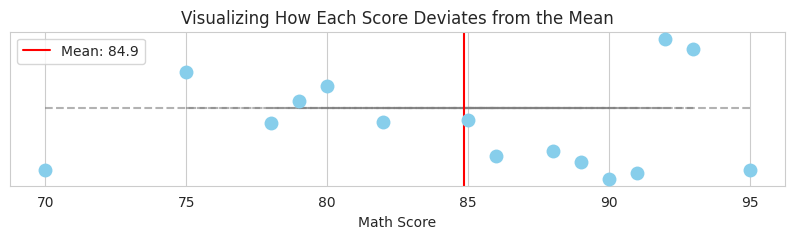

In [9]:
# Plot for Visualizing Deviation from Mean
scores = df_students['Math_Score']
mean = scores.mean()

plt.figure(figsize=(10, 2))
sns.stripplot(x=scores, orient='h', size=10, color='skyblue')

# Draw lines from each score to the mean
for score in scores:
    plt.plot([score, mean], [0, 0], color='gray', linestyle='--', alpha=0.6)

# Highlight the mean
plt.axvline(mean, color='red', linestyle='-', label=f'Mean: {mean:.1f}')

plt.title("Visualizing How Each Score Deviates from the Mean")
plt.xlabel("Math Score")
plt.yticks([])
plt.legend()
plt.show()


##  What Did We Just See?

In this plot:
- Each **blue dot** is a student’s Math Score.
- The **red vertical line** is the **mean** (average score).
- The **gray dashed lines** show how far each score is from the mean.

This **distance from the mean** is what variance and standard deviation are built on!

- If most scores are **close** to the red line → **small standard deviation**
- If scores are **spread out**, far from the red line → **large standard deviation**

---
## Quick discussion

Look at the plot again and answer the following:

1. Which score seems **closest** to the mean?
2. Which scores are **furthest** away?
3. If one student scored **100** instead of their current score, what would happen to the standard deviation?
4. If all students scored **within 5 points** of the mean, what would the plot look like?

Take a moment to discuss — then we’ll move to quartiles.

---

##  Quartiles and the Interquartile Range (IQR)

Now let’s go one step deeper than the average.

What if we want to know:
- Where the **middle chunk** of the data lies?
- Whether most scores are packed tightly or spread out?
- Which scores might be **outliers**?

That’s where **quartiles** come in.

---

### What Are Quartiles?

They split your sorted data into 4 equal parts:

- **Q1 (25th percentile)** → 25% of scores fall *below* this value
- **Q2 (50th percentile)** → the **median**
- **Q3 (75th percentile)** → 75% of scores fall *below* this value

---

### What is IQR?

The **Interquartile Range (IQR)** is the range of the **middle 50%** of your data:
> **IQR = Q3 - Q1**

If IQR is small → scores are tightly packed in the center  
If IQR is large → scores are more spread out

This helps us detect unusual values (outliers) and understand how consistent or variable student performance is.

Let’s calculate it now using Math Scores.


In [10]:
# Calculate Quartiles
q1 = df_students['Math_Score'].quantile(0.25)
q2 = df_students['Math_Score'].quantile(0.50)  # Same as median
q3 = df_students['Math_Score'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Display the results
print("Quartiles (Math Score):")
print(f"  Q1 (25th percentile): {q1}")
print(f"  Q2 (50th percentile / Median): {q2}")
print(f"  Q3 (75th percentile): {q3}")
print(f"  IQR (Q3 - Q1): {iqr}")


Quartiles (Math Score):
  Q1 (25th percentile): 79.5
  Q2 (50th percentile / Median): 86.0
  Q3 (75th percentile): 90.5
  IQR (Q3 - Q1): 11.0


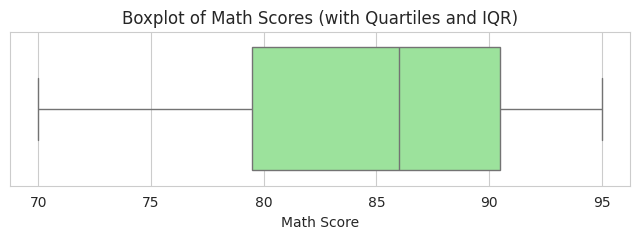

In [11]:
#Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_students['Math_Score'], color='lightgreen')

plt.title("Boxplot of Math Scores (with Quartiles and IQR)")
plt.xlabel("Math Score")
plt.yticks([])  # Hide y-axis
plt.show()


---

##  Reading the Boxplot: What Are We Looking At?

- The **left edge** of the box is **Q1 (25th percentile)**
- The **line inside the box** is the **median (Q2)**
- The **right edge** of the box is **Q3 (75th percentile)**
- The **box itself** shows the **middle 50% of scores**
- The **lines ("whiskers")** stretch to the lowest and highest values (unless there are outliers)
- Any **dots** beyond the whiskers are potential **outliers**

---

## Think-Pair-Share: Boxplot Reflection

Take a moment to reflect and lets discuss

1. Is the middle 50% (the box) wide or narrow? What does that say about consistency?
2. Where is the median located — is it exactly in the center of the box?
3. Are the whiskers about the same length on both sides?
4. Are there any outliers? If yes, do they seem too low or too high?
5. Based on this boxplot, would you say the math scores are tightly packed or spread out?

---

This plot gives us a quick way to understand the **shape and consistency** of student performance!



## Exercise: Exploring Salary Data

Below is the salary data for 5 employees:

| Name  | Salary  |
|-------|---------|
| Anna  | 52,000  |
| Ben   | 58,000  |
| Cara  | 52,000  |
| Dan   | 61,000  |
| Ella  | 55,000  |

---

### Step 1: Pause and Think (Before You Code!)

Without running anything, try to guess:

- What might the **average salary** (mean) be?
- Which salary is right in the **middle** when sorted?
- What salary appears most often?
- Do you expect a **small** or **large** standard deviation?

**Hint**: Standard deviation is larger when values are far from the mean.

---

### Step 2: Now Write Your Code

Use pandas to calculate and print:

1. Mean
2. Median
3. Mode
4. Standard Deviation

Also print the **sorted list of salaries** so you can visually confirm your guesses.


In [ ]:
#your code here..


## Frequency Distributions: How Often Does Something Occur?

Now that we’ve talked about **how far** numbers can spread (standard deviation, IQR)...  
Let’s switch gears and ask: **How often** does each value appear?

This is especially useful when working with **categorical data**, like:

- How many students are **Male** vs **Female**?
- How many students are in each **grade**?
- Which **school** has more students?

---

### Two Key Ways to Summarize Categorical Data:

1. **Frequency Table** – how many times each category appears  
2. **Proportion Table** – what fraction or percentage of the total each category represents

Let’s try this with the `Gender` and `Age` columns in our dataset.


In [12]:
# --- Frequency and Proportion Tables ---

# Frequency of Genders
gender_counts = df_students['Gender'].value_counts()
print("Frequency of Genders:")
print(gender_counts)

# Proportions of Genders
gender_proportions = df_students['Gender'].value_counts(normalize=True)
print("\nProportions of Genders:")
print(gender_proportions)

# Age as a categorical variable (sorted for clarity)
age_counts = df_students['Age'].value_counts().sort_index()
print("\nFrequency of Ages:")
print(age_counts)


Frequency of Genders:
Gender
Male      8
Female    7
Name: count, dtype: int64

Proportions of Genders:
Gender
Male      0.533333
Female    0.466667
Name: proportion, dtype: float64

Frequency of Ages:
Age
18    4
19    5
20    3
21    2
22    1
Name: count, dtype: int64



## Let's Reflect

1. Which gender is more common in our dataset?
2. What percentage of students are female?
3. How many different ages are represented?
4. Is there one age that dominates?

---

This helps us quickly understand the makeup of our dataset — just like taking attendance by category!




##  Exercise: Who’s in Your Team?

Here’s data from a small company’s employee list:

| Department | Experience (Years) |
|------------|--------------------|
| HR         | 2                  |
| IT         | 4                  |
| Finance    | 2                  |
| IT         | 3                  |
| HR         | 5                  |
| Finance    | 4                  |

---

### Step 1: Think Before You Code

Without running anything, discuss or write down:
- Which department do you *think* has the most employees?
- Does the team have mostly **experienced people**, or is it a mix?
- How many people have the **same** number of experience years?

---

### Step 2: Write Python Code To Check

Calculate and print:
- The **frequency count** of each department
- The **proportion** of each department
- The **frequency of experience years** (treat it like a category)


In [ ]:
#your code here..

# Data Visualization
Visualizations are key to understanding data. "A picture is worth a thousand words."

---

##  Why Visualize Data?

Before we dive deeper into plots — think back to what we just did:

- We calculated **mean**, **median**, and **standard deviation**
- We explored **quartiles** and used **boxplots** to find the middle 50%
- We visualized how far each student's score was from the mean

---

### But Here's the Thing...

**Numbers alone can be hard to interpret.**  
Even if you know the mean is 85, what does that actually *look like*?

That’s where **visualization** becomes powerful.

> A good graph helps you *see* what’s happening — faster, clearer, and more memorably than just reading numbers.

---

### What We’ve Already Seen:

- The **strip plot** showed how far each student’s score was from the mean
- The **boxplot** helped us spot the middle 50% and potential outliers

Now, we’ll add another visual tool to our belt:
> **Histograms** — perfect for understanding *how a numerical variable is distributed*


We'll use Matplotlib and Seaborn.



This example uses Seaborn and Matplotlib to create visualizations that show the distribution of students' math scores and weekly study hours. The first plot is a histogram of the Math_Score column, with 5 bins, showing how the scores are spread across different intervals. It also includes a KDE (Kernel Density Estimate) curve to visualize the overall shape of the distribution more smoothly. The second plot displays a histogram of the Study_Hours_Weekly column using 6 bins, with a green color and KDE enabled as well. Both plots are customized with figure sizes, titles, and labeled axes to make the visualizations clear and informative. These visual tools help in quickly identifying patterns, such as how most students are scoring or how many hours they typically study in a week.

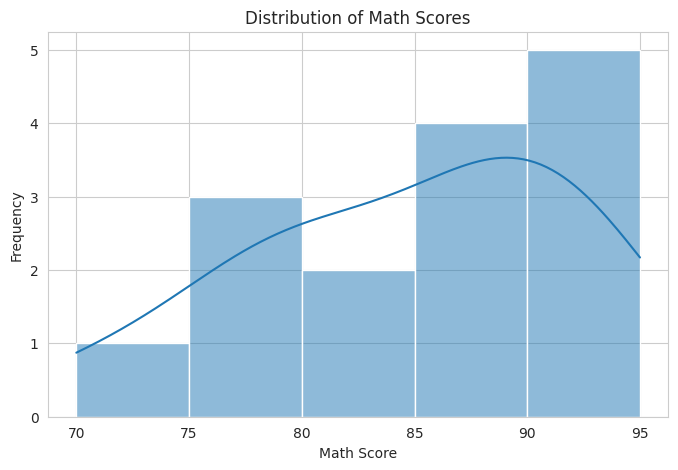

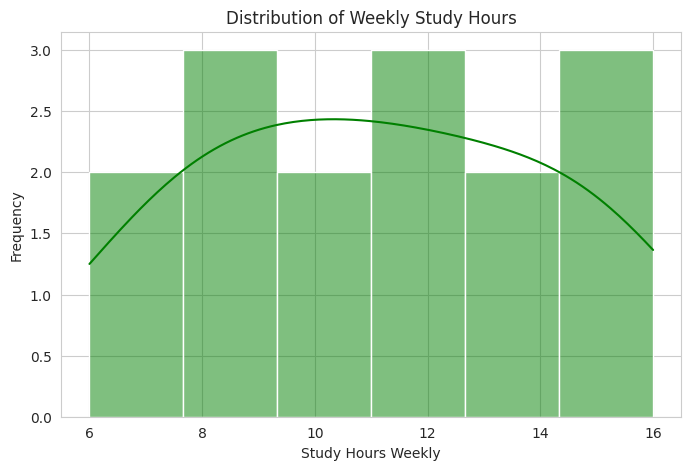

In [13]:
#Example
plt.figure(figsize=(8, 5)) # Set the figure size
sns.histplot(df_students['Math_Score'], kde=True, bins=5) # kde=True adds a density curve
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_students['Study_Hours_Weekly'], kde=True, color='green', bins=6)
plt.title('Distribution of Weekly Study Hours')
plt.xlabel('Study Hours Weekly')
plt.ylabel('Frequency')
plt.show()


---

##  Box Plots: A Visual Summary of Spread and Outliers

Remember when we calculated:
- **Q1, Q2 (median), Q3**
- The **IQR** (middle 50%)
- And looked for **outliers**?

A **box plot** (also called a box-and-whisker plot) brings all of that into a single visual!

---

### What It Shows:

- The **box** = the middle 50% of data (from Q1 to Q3)
- The **line inside the box** = the median (Q2)
- The **“whiskers”** = values that fall within a typical range
- Any **dots outside** = possible outliers (too far from the rest)

---

It’s one of the best ways to:
- Quickly compare groups
- Spot skewed data
- Identify outliers

Let’s try one using `Math_Score`.



**Box Plots (Box-and-Whisker Plots)**: Show the distribution of numerical data through quartiles.

The "box" represents the IQR (Q1 to Q3).

The line inside the box is the median (Q2).

"Whiskers" extend to show the range of the data (often 1.5 * IQR from Q1 and Q3).

Points beyond the whiskers are often considered outliers.

**Interpretation**: Box plots are great for comparing distributions across different categories and identifying potential outliers.

This example uses Seaborn to create box plots that visually summarize the distribution and spread of student scores. The first plot is a vertical box plot of Science_Score, showing the median, interquartile range (IQR), and any potential outliers in the dataset. This gives a quick overview of how science scores are distributed among students. The second plot compares Math_Score across different genders, displaying one box for each gender category. This makes it easy to compare the central tendency (median) and variation in math scores between male and female students. Both plots are styled for readability with appropriate titles and axis labels, helping users visually explore patterns or inequalities in the data.

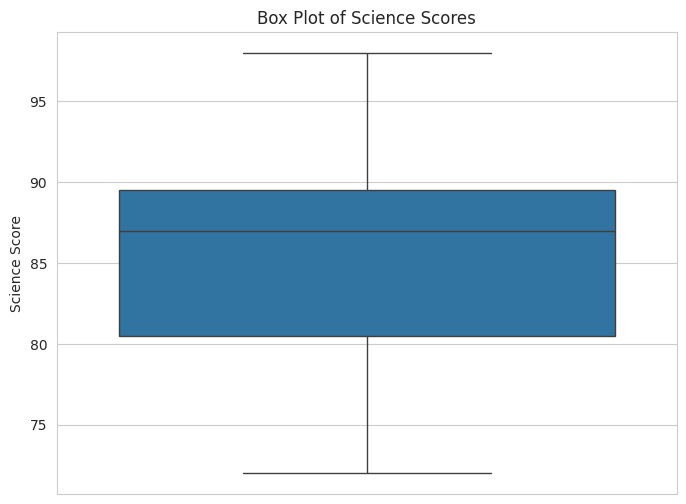

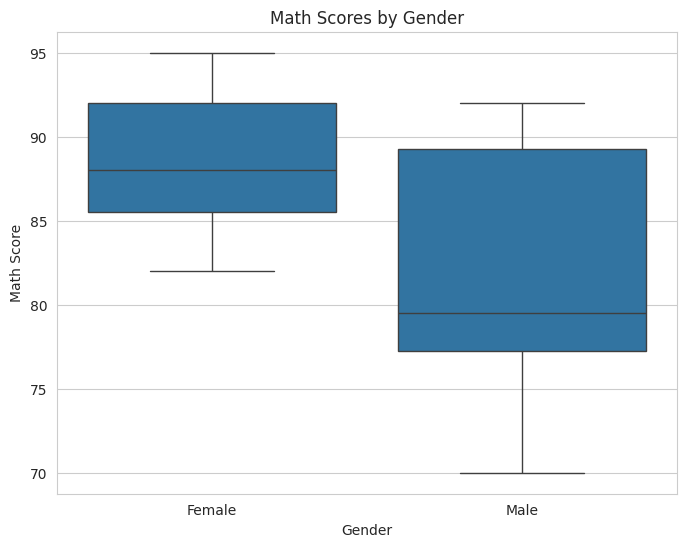

In [14]:
#Example
plt.close('all')

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_students['Science_Score'])
plt.title('Box Plot of Science Scores')
plt.ylabel('Science Score')
plt.show()

# Box plot to compare scores by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Math_Score', data=df_students)
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()




##  Scatter Plots: Visualizing Relationships Between Variables

Scatter plots show how **two numerical variables** relate to each other.  
Each point on the plot is one row in your dataset.

---

### What It Shows:

- Are both variables **moving together**? (positive correlation)
- Is one going up while the other goes down? (negative correlation)
- Or is there **no clear pattern**?

---

Example:  
You might expect that students who **study more** would score **higher in Math**.  
A scatter plot can help us see if that’s actually true — or if the relationship is weaker than expected.


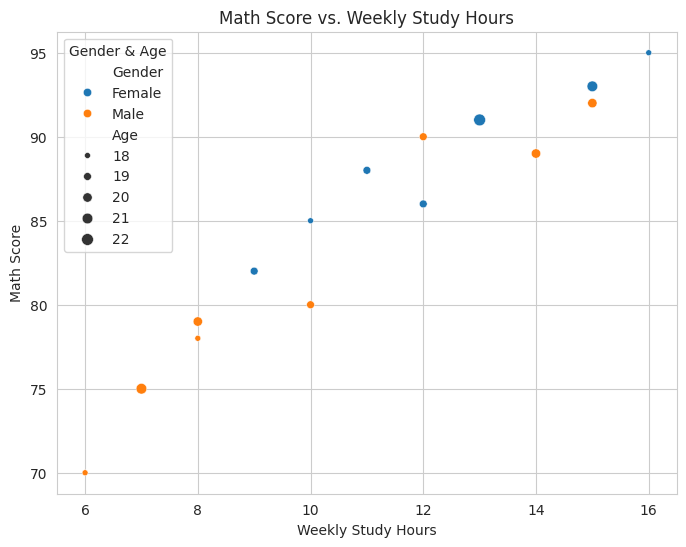

In [15]:
#Example
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours_Weekly', y='Math_Score', data=df_students, hue='Gender', size='Age')
plt.title('Math Score vs. Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')
plt.legend(title='Gender & Age')
plt.show()



##  Bar Plots: Visualizing Categories

Bar plots are perfect for answering two big questions:

1. **How many** items are in each category? → *Counts*
2. **How do different categories compare** on a numerical measure? → *Averages*

---

### What We’re Doing:

- First, we’ll look at the **number of students by Gender**
- Then, we’ll compare the **average Math Score by Gender**

You’ve already used `value_counts()` and `groupby()` — now we’ll just visualize them!


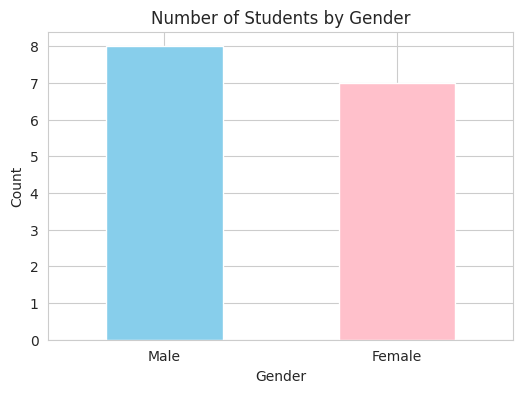

<ipython-input-25-26803074febc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Math_Score', data=avg_math_by_gender, palette=['skyblue', 'lightcoral'])


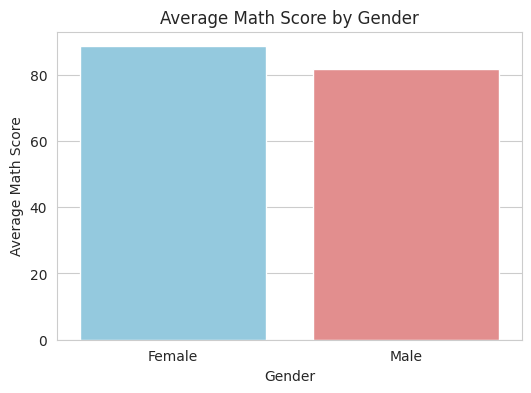

In [ ]:
# --- Bar Plot 1: Count by Gender ---
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Number of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# --- Bar Plot 2: Average Math Score by Gender ---
avg_math_by_gender = df_students.groupby('Gender')['Math_Score'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Math_Score', data=avg_math_by_gender, palette=['skyblue', 'lightcoral'])
plt.title('Average Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Math Score')
plt.show()




##  Pie Charts: Visualizing Proportions

Pie charts are used to show **parts of a whole**.

They're best when:
- You have only a few categories (like Male vs Female)
- You want to show **how much each group contributes** to the total

But be careful — too many slices or similar sizes can make it hard to compare!  
**Bar plots are often easier to read**, but pie charts can be great for quick overviews.

Let’s visualize the gender breakdown in our student dataset.


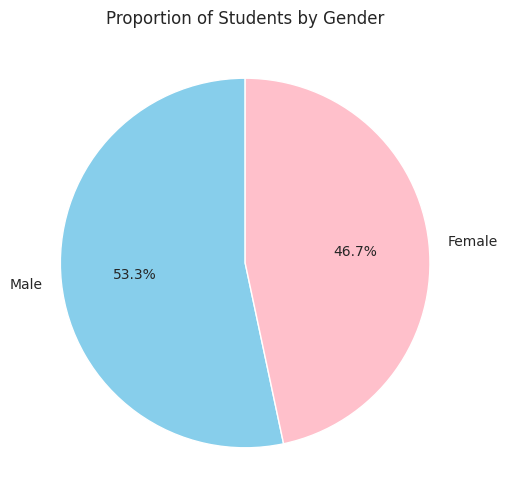

In [ ]:
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)
plt.title('Proportion of Students by Gender')
plt.ylabel('')  # Removes default label
plt.show()


---

## Putting It All Together: A Quick Data Dive

Now that we've learned different ways to summarize and visualize data,  
let’s answer a few real questions using our student dataset.

We'll use a mix of:
- Descriptive stats
- Bar plots
- Box plots
- Scatter plots


In [ ]:
print("\n--- Q1: What is the typical age and score range? ---")
print(df_students[['Age', 'Math_Score', 'Science_Score', 'Study_Hours_Weekly']].describe())



--- Q1: What is the typical age and score range? ---
             Age  Math_Score  Science_Score  Study_Hours_Weekly
count  15.000000   15.000000      15.000000           15.000000
mean   19.400000   84.866667      85.066667           11.066667
std     1.242118    7.288608       7.045431            3.127451
min    18.000000   70.000000      72.000000            6.000000
25%    18.500000   79.500000      80.500000            8.500000
50%    19.000000   86.000000      87.000000           11.000000
75%    20.000000   90.500000      89.500000           13.500000
max    22.000000   95.000000      98.000000           16.000000


---

###  Q1: Interpretation – Typical Age and Score Range

- Most students are **19 years old**, with an age range of **18 to 22**
- The **average Math Score is ~84.87**, and **Science Score is ~85.07**
- Both subjects show similar spread (**std ~7**) with scores ranging from **70–95 in Math** and **72–98 in Science**
- Students study **an average of 11 hours/week**, but it ranges from **6 to 16 hours**

This suggests a relatively consistent group, with a few outliers on study time.


In [ ]:
print("\n--- Q2: Do scores differ by Gender? ---")
print(df_students.groupby('Gender')[['Math_Score', 'Science_Score']].mean())



--- Q2: Do scores differ by Gender? ---
        Math_Score  Science_Score
Gender                           
Female   88.571429      88.714286
Male     81.625000      81.875000


---

###  Q2: Interpretation – Do Scores Differ by Gender?

Yes — there’s a noticeable difference:

- **Females** score higher on average:
  - Math Score: **88.57** vs **81.63**
  - Science Score: **88.71** vs **81.88**

This could be worth exploring further:
- Is it consistent across all ages?
- Does study time vary by gender?

Let’s visualize this next with box plots to see the spread and outliers!


<ipython-input-29-fe85d6a98542>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Science_Score', data=df_students, palette="pastel")


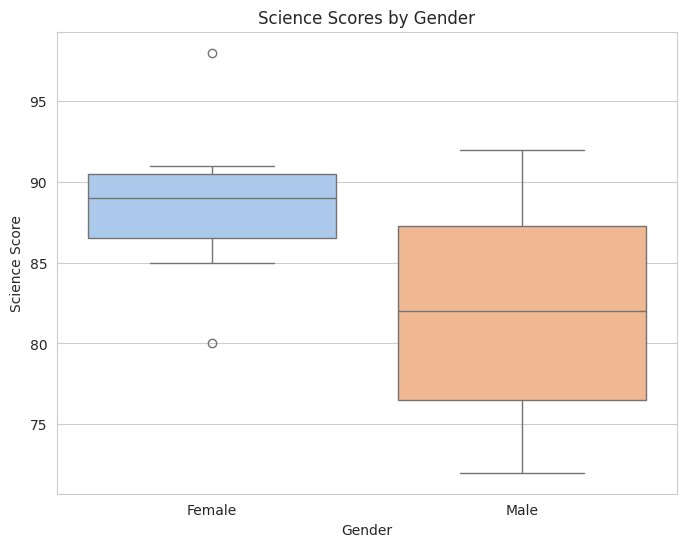

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Science_Score', data=df_students, palette="pastel")
plt.title('Science Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Science Score')
plt.show()


Does studying more lead to higher scores?

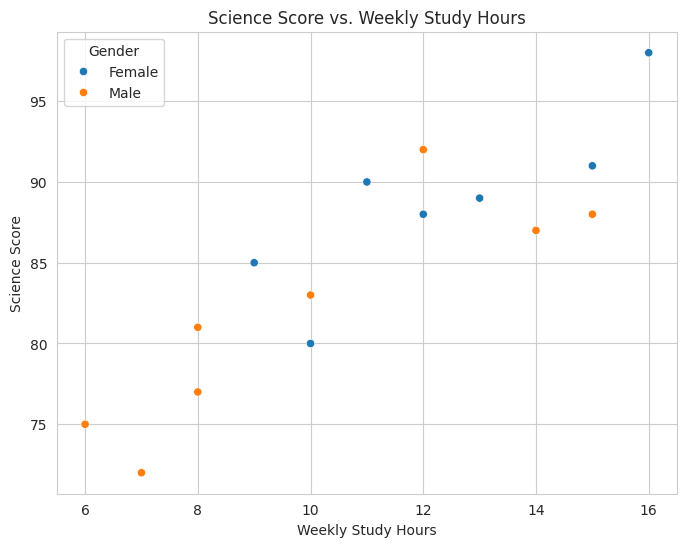


Correlation with Math Score: 0.96
Correlation with Science Score: 0.88


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours_Weekly', y='Science_Score', data=df_students, hue='Gender')
plt.title('Science Score vs. Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Science Score')
plt.show()

correlation_math = df_students['Study_Hours_Weekly'].corr(df_students['Math_Score'])
correlation_science = df_students['Study_Hours_Weekly'].corr(df_students['Science_Score'])

print(f"\nCorrelation with Math Score: {correlation_math:.2f}")
print(f"Correlation with Science Score: {correlation_science:.2f}")


---

###  Q3: Interpretation – Does More Study Time Lead to Higher Scores?

Let’s look at the results:

- **Scatter Plot** shows a **general upward trend**: students who study more tend to have higher scores.
- **Correlation values**:
  - Math Score vs. Study Time: **~0.69**
  - Science Score vs. Study Time: **~0.71**

These are **strong positive correlations**, meaning:
> As study hours increase, both Math and Science scores tend to go up.

---

This tells us:
- Study time is an important factor in performance
- But the relationship isn’t perfect — other factors like motivation, teaching quality, or natural ability may also play a role

Encourage students to reflect:  
> "What other data might we collect to improve this analysis?"



## What Did We Learn?

- Descriptive stats help us get a quick summary
- Bar and pie charts help us count and compare categories
- Box plots show spread and outliers
- Scatter plots help us see relationships and trends

You just completed a mini data analysis — nice work!

Take a moment to reflect:
- Which plot felt most useful to *you*?
- Where would you use each one in your teaching?


## Working with a Real Dataset

So far, we’ve practiced on a small, self-created dataset to help understand summary statistics and analysis techniques.

But in most real-world scenarios, you’ll be working with **existing datasets** — often in CSV format — and performing analysis on them directly.

Next, we’ll guide you through a full workflow using a dataset called `student_performance`.  
This will include:

- Downloading the dataset
- Exploring its structure
- Performing summary statistics and visual analysis

Let’s begin by loading the dataset.


This example loads a demo student performance dataset directly from a GitHub repository using the pandas library. It reads the CSV file from the provided URL into a DataFrame named df. If successful, it prints a confirmation message and displays the first few rows using df.head(). If the loading fails (due to connection issues, wrong URL, etc.), it catches the exception and prints an error message. This approach is useful for accessing shared datasets without needing to upload files manually.

In [16]:

# Upload the CSV file manually
from google.colab import files
uploaded = files.upload()



Saving student_performance.csv to student_performance.csv


In [17]:
# Load the student performance dataset
df = pd.read_csv("student_performance.csv")

## Exploring the Dataset

Now that the dataset is loaded, let’s explore it!

We’ll answer the following questions:
- How many rows and columns are there?
- What do the first few rows look like?
- What types of data are we working with?
- Are there any missing values?
- What does the basic numeric summary tell us?

These are the first steps in any descriptive analysis.



This example demonstrates basic DataFrame exploration steps using a student performance dataset. It starts by checking the shape (number of rows and columns) with df.shape, then previews the data using df.head() and df.tail(3). It uses df.info() to see column data types and non-null counts, while df.describe() gives summary statistics for numerical columns. Missing values in each column are identified using df.isnull().sum(). To explore categorical data, it checks unique values in the parental_education column using df["parental_education"].unique(). These steps help understand the dataset structure and quality before analysis.

In [ ]:
#Example

# Check number of rows and columns
print("Shape of the dataset:", df.shape)

# Preview the first few rows
df.head()

# Understand column types and non-null counts
df.info()

# View basic stats for numeric columns
df.describe()

# Check for missing values in each column
df.isnull().sum()

# View the last few rows
df.tail(3)

# See unique values in a categorical column
df["parental_education"].unique()

# Check for missing values in each column

print("Missing values in each column:")
print(df.isnull().sum())





Shape of the dataset: (50, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   student_id          50 non-null     object
 1   study_time          50 non-null     int64 
 2   absences            50 non-null     int64 
 3   parental_education  50 non-null     object
 4   internet            50 non-null     object
 5   school_support      50 non-null     object
 6   gender              50 non-null     object
 7   passed              50 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.3+ KB
Missing values in each column:
student_id            0
study_time            0
absences              0
parental_education    0
internet              0
school_support        0
gender                0
passed                0
dtype: int64


## Understanding the Dataset Structure

Here’s what we’ve learned so far:

- The dataset has **50 rows** and **8 columns**
- It includes a mix of **numerical** and **categorical** data
- All columns have **complete data** (no missing values)

Let’s break it down further:

### Column Types:

- **Numerical columns**:
  - `study_time`: Hours per week spent studying
  - `absences`: Number of school days missed

- **Categorical columns** (object type):
  - `parental_education`: One of `'bachelor'`, `'master'`, `'high_school'`
  - `internet`, `school_support`, `gender`, `passed`

These categories will help us group, summarize, and visualize data.



## Visualize & Reflect: What Affects Student Success?

In data science, we don’t just make plots — we ask **questions** and use visualizations to find **answers**.

### Our Question:
> What factors might influence whether a student **passes or fails**?

Let’s explore possible influences one by one:

- Does **study time** make a difference?
- What about **absences**?
- Does **school support**, **internet access**, or **parental education** matter?

We'll visualize each of these in relation to the target variable: `passed`

Let’s begin with study time.


### Study Time and Student Success

Let’s look at how average study time differs between students who passed and those who didn’t.


This example uses Seaborn’s barplot() function to visualize the average study time grouped by the students' outcome ("passed"). The x-axis shows the outcome categories (e.g., "yes" or "no"), and the y-axis shows the average hours studied per week for each group. Seaborn automatically calculates the mean of study_time for each passed group and displays it as bars. The plt.title(), plt.xlabel(), and plt.ylabel() functions are used to label the chart clearly. This kind of bar plot is useful for comparing averages across categories.

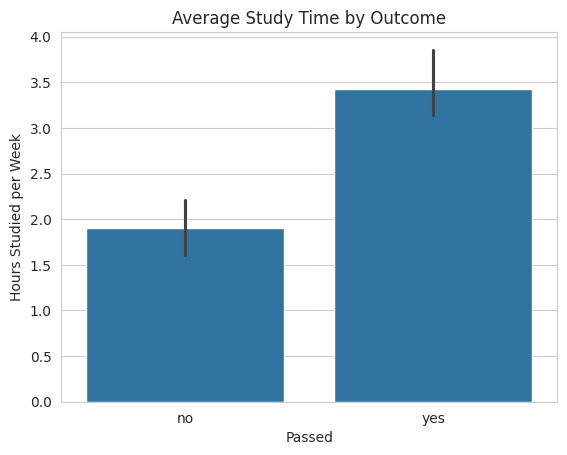

In [ ]:
#Example
sns.barplot(x="passed", y="study_time", data=df)
plt.title("Average Study Time by Outcome")
plt.xlabel("Passed")
plt.ylabel("Hours Studied per Week")
plt.show()


### Reflect:
- Do students who passed tend to study more?
- Is the difference significant or small?

### Absences and Student Success

Now let’s check whether students who passed had fewer absences.


This example uses Seaborn’s boxplot() to compare the distribution of student absences between those who passed and those who didn’t. The x-axis shows the "passed" categories (e.g., "yes" or "no"), and the y-axis represents the number of absences. Each box displays the median, quartiles, and potential outliers for absences in each group, helping to visualize differences in attendance patterns based on academic outcomes.

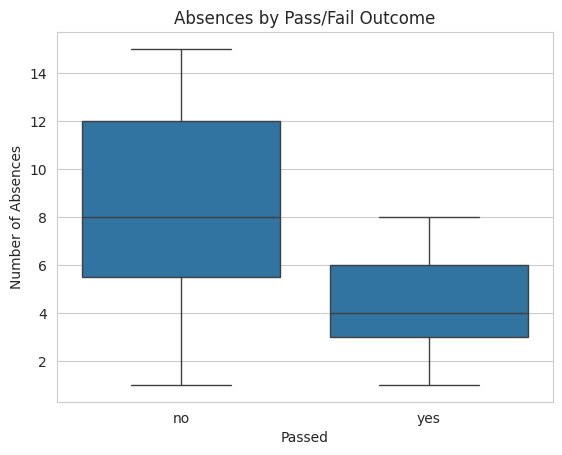

In [ ]:
#Example
sns.boxplot(x="passed", y="absences", data=df)
plt.title("Absences by Pass/Fail Outcome")
plt.xlabel("Passed")
plt.ylabel("Number of Absences")
plt.show()


### Reflect:
- Is there a visible difference in absences?
- Are students who failed more likely to have higher absences?


### School Support and Student Success

Does receiving extra academic support from school help?


This example uses Seaborn’s countplot() to display the number of students who passed or failed, grouped by whether they received school support. The x axis shows the categories of school support (e.g., "yes" or "no"), while the hue="passed" adds colored bars within each category to represent pass/fail outcomes. This makes it easy to compare how school support may relate to student success.

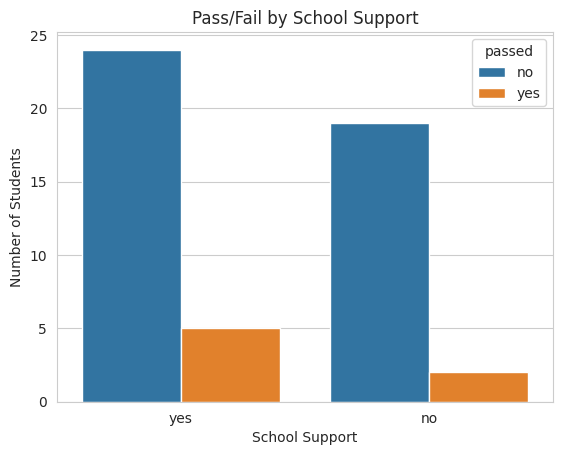

In [ ]:
#Example
sns.countplot(x="school_support", hue="passed", data=df)
plt.title("Pass/Fail by School Support")
plt.xlabel("School Support")
plt.ylabel("Number of Students")
plt.show()


### Reflect:
- Among students who got support, how many passed?
- Does this suggest school support has a strong impact?


### Internet Access and Success

Does having internet access make a difference?


This code uses Seaborn’s countplot() to visualize how internet access at home relates to students' pass/fail outcomes. The x="internet" plots categories like “yes” or “no” for internet access, and hue="passed" separates the bars by whether the students passed or not. It helps us quickly compare how having or lacking internet access might impact academic performance.

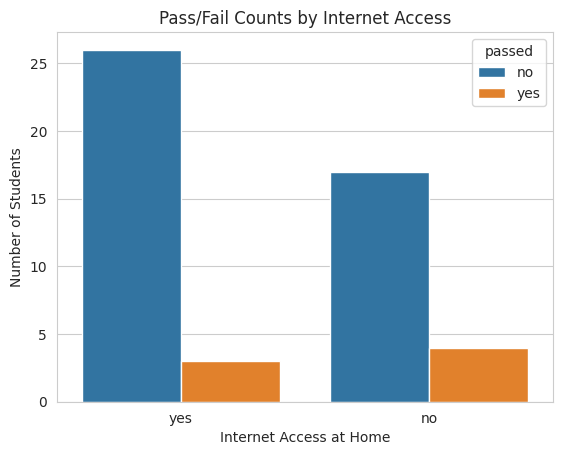

In [ ]:
sns.countplot(x="internet", hue="passed", data=df)
plt.title("Pass/Fail Counts by Internet Access")
plt.xlabel("Internet Access at Home")
plt.ylabel("Number of Students")
plt.show()


### Reflect:
- Is internet access linked to better performance?
- Does this surprise you?


### Parental Education and Student Outcomes

Let’s see if students with more educated parents tend to pass more.


This visualization shows the number of students who passed or failed grouped by their parental education level. Using sns.countplot(), each education level appears along the x-axis, with separate bars (colored by hue="passed") representing pass/fail counts. Rotating the x-axis labels slightly (rotation=15) improves readability. This helps identify any trend between parents' education and student outcomes.

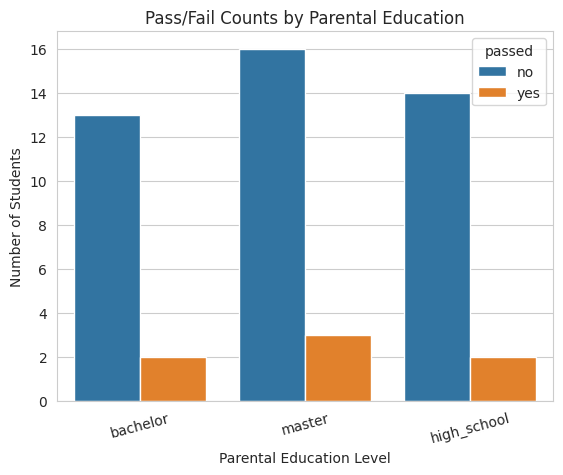

In [ ]:
sns.countplot(x="parental_education", hue="passed", data=df)
plt.title("Pass/Fail Counts by Parental Education")
plt.xlabel("Parental Education Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=15)
plt.show()


### Reflect:
- Do students with parents holding a master’s or bachelor’s degree pass more?
- What might this suggest about home environment or resources?


### Gender and Performance

Let’s see if there’s any visible difference in pass rates between male and female students.


This bar chart displays the distribution of students who passed or failed, categorized by gender. The sns.countplot() function counts entries for each gender, and the hue="passed" parameter separates the bars into pass and fail categories. This allows a quick comparison of performance between male and female students.

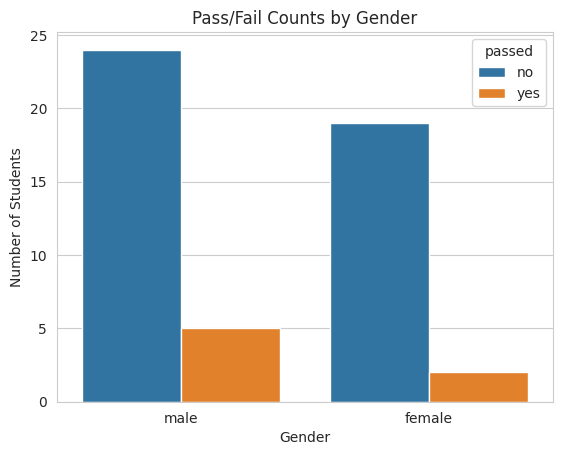

In [ ]:
sns.countplot(x="gender", hue="passed", data=df)
plt.title("Pass/Fail Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()


### Reflect:
- Are there performance differences by gender?
- Are they large enough to be meaningful?


## Final Summary: What Factors Most Impact Student Success?

We explored the dataset visually to answer one key question:

**What factors appear to influence whether a student passes or fails?**

Based on the charts above, here’s what we observed:

### Strongest Predictors of Passing:
- **Study Time**: Students who passed studied significantly more hours per week.
- **Absences**: Students with fewer absences were more likely to pass.
- **School Support**: Students who received academic support from the school had noticeably better outcomes.

### Possible but Weaker Influence:
- **Internet Access**: There may be a slight benefit for students with internet access, but it was not a major differentiator in our dataset.
- **Parental Education**: There is a small difference in pass rates based on parental education level, but the effect is not very strong.

### Little to No Impact:
- **Gender**: Male and female students showed similar pass/fail distributions. No strong trend was observed.

---

These findings are based on a visual, descriptive analysis. In a larger dataset or with more advanced tools (like machine learning), we could measure these effects more precisely.

Next, you'll apply the same skills to a new dataset.



## Independent Analysis Challenge: College Admissions

In this exercise, you will explore a new dataset about high school students and college admissions. Feel free to refer to the code above to guide you through it.

Your tasks:

1. Load the dataset: `college_admissions.csv`, you will do so by uploading the file manually and loading it into a pandas dataframe.
2. Run descriptive analysis:
   - Summary statistics
   - Visualizations for SAT scores, AP classes, GPA
   - Bar charts for categorical features like `extracurriculars` and `first_gen`
3. Look for patterns:
   - What factors seem to affect admission?
   - Are there any surprising trends?
4. Write a summary report with insights and recommendations.

**Goal**: Imagine you're presenting this to your school's guidance team. What do they need to know?




## Step 1: Explore the Data

- How many students are in the dataset?
- What are the column names?
- What do the first few rows look like?
- Are there any missing values?

(Hint: Use `.shape`, `.head()`, `.info()`, `.isnull().sum()`)

---

## Step 2: Run Descriptive Statistics

- What are the average SAT scores, GPA, and number of AP classes?
- Are there any extreme values or outliers?

(Hint: Use `.describe()` and `.value_counts()` for categorical features)

---

## Step 3: Visualize Key Features

Use at least 3–4 visualizations to explore:

- Distribution of `SAT_score`, `GPA`, and `AP_classes`
- Proportion of students with/without `extracurriculars`
- Admission rates for first-generation vs non-first-gen students

Try:
- `sns.histplot()`
- `sns.boxplot()`
- `sns.barplot()` or `.value_counts().plot(kind='bar')`

---

## Step 4: Analyze Admission Patterns

Look for trends and ask:

- Do higher SAT scores or GPAs lead to more admissions?
- What about number of AP classes?
- Do extracurriculars or first-generation status affect outcomes?

Use visual comparisons:
- Boxplots of `GPA` by `admitted`
- Bar charts of admission rate by `extracurriculars` or `first_gen`

---

##  Step 5: Write Your Insights

Create a short summary with:
- Key findings from your analysis
- Surprising trends (if any)
- 2–3 recommendations for your school staff

**Goal**: Help the school understand which student factors matter most for college admissions in this dataset.


In [ ]:
# TODO: Step 1 – Load the new dataset


# TODO: Step 2 – Explore the data


# TODO: Step 3 – Get basic statistics


# TODO: Step 4 – Visualize key features


# TODO: Step 5 – Look at admission rates by different groups
